# Trabajo Práctico Semanal Nº15
Teoria de circuitos 2

### Sandomir Laham Uriel

Diseñe el cuadripolo A para que se comporte como:
* Filtro pasa bajos Chebyshev de 4to. orden, 1dB de ripple. 
* No disipativo.
* Normalizado en frecuencia e impedancia.
<img src="https://i.gyazo.com/4796a1755b93524a443f8dff05a10667.png"/>

### Diseño del cuadripolo

Para el diseño del cuadripolo, sabemos que el parametro $S_{21}$ corresponde a la transferencia directa, la cual debera coincidir con la funcion transferencia de un filtro Chebyshev Pasa-Bajos de orden 4 con 1dB de ripple:

In [47]:
import numpy as np
import scipy.signal as sig
import splane as tc2
import matplotlib.pyplot as plt
from sympy import * 

init_printing(use_unicode = True)
s = symbols('s', relational= True)

alpha_max = 1 #dB

### Epsilon para 1dB:
ee = 10**(alpha_max/10) - 1

### Polinomio de Chebyshev:
C0 = 1
C1 = s
C2 = 2*s*C1 - C0
C3 = 2*s*C2 - C1
C4 = 2*s*C3 - C2

expand(ee*C4**2)

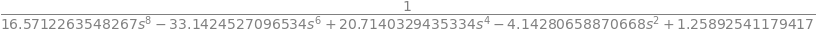

In [50]:
### Armo el polinomio:
S21_2 = 1/(1 + 16.5712263548267*s**8 - 33.1424527096534*s**6 + 20.7140329435334*s**4 - 4.14280658870668*s**2 + 0.258925411794167)
simplify(S21_2)

<BR><BR>Para la sintesis del cuadripolo, necesitamos obtener el parametro $S_{11}$ sabiendo $|S_{11}|^2 = 1 - |S_{21}|^2$

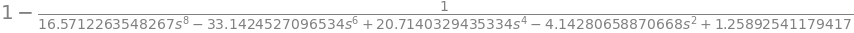

In [68]:
S11_2 = 1 - S21_2
simplify(S11_2)

<br><br>
Buscamos los ceros y polos en el semiplano izquierdo de S11:

In [77]:
### Calculamos los ceros y polos

num = np.roots([16.5712263548267, 0 , -33.1424527096534, 0, 20.7140329435334, 0, -4.14280658870668, 0, 0.25892541179417])
den = np.roots([16.5712263548267, 0 , -33.1424527096534, 0, 20.7140329435334, 0, -4.14280658870668, 0, 1.25892541179417])
num, den

(array([-0.92387953+2.84599113e-08j, -0.92387953-2.84599113e-08j,
         0.92387953+2.84919206e-08j,  0.92387953-2.84919206e-08j,
        -0.38268343+2.29677375e-08j, -0.38268343-2.29677375e-08j,
         0.38268343+2.29942860e-08j,  0.38268343-2.29942860e-08j]),
 array([-0.98337916+0.139536j  , -0.98337916-0.139536j  ,
         0.98337916+0.139536j  ,  0.98337916-0.139536j  ,
        -0.40732899+0.33686969j, -0.40732899-0.33686969j,
         0.40732899+0.33686969j,  0.40732899-0.33686969j]))

In [91]:
### Descartamos los que tienen parte real positiva:

zeros = np.array([-0.92387953+2.84599113e-08j, -0.92387953-2.84599113e-08j, -0.38268343+2.29677375e-08j, -0.38268343-2.29677375e-08j])
poles = np.array([-0.98337916+0.139536j, -0.98337916-0.139536j, -0.40732899+0.33686969j, -0.40732899-0.33686969j])

num_cheb, den_cheb = sig.zpk2tf(zeros, poles, 1)
tc2.pretty_print_lti(num_cheb, den_cheb)

<IPython.core.display.Math object>

B:\Users\Uriel\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
B:\Users\Uriel\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
B:\Users\Uriel\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
B:\Users\Uriel\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

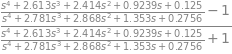

In [96]:
S11 = (s**4+s**3*2.613+s**2*2.414+s*0.9239+0.125)/(s**4+s**3*2.781+s**2*2.868+s*1.353+0.2756)
Z1 = (S11 - 1)/(S11 + 1)
Z1